In [21]:
import numpy as np
import matplotlib.pyplot  as plt
import dft as luludft
import alaw

from numpy import genfromtxt

try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle
    
from scipy.signal import hilbert

In [22]:
with open('lit3rick_i2s.pkl', 'rb') as fp:
    data = pickle.load(fp)
signal = data["single_raw"]
t = data["t"]
print(data.keys())

dict_keys(['t', 'tfft', 'single_fft', 'i2s_fft', 'single_raw'])


In [55]:
BiVi = []
window = 32
for k in range(int(len(data["single_raw"])/window)):
    start = k*window
    stop = k*window+window-1
    #print(start,stop,start/256)
    BiVi.append(np.max(np.abs(data["single_raw"][start:stop])))

In [25]:
fs = 64.0
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)

In [45]:
signal

array([0.00488281, 0.00683594, 0.00488281, ..., 0.00390625, 0.00097656,
       0.01074219])

In [49]:
SIGClean = np.array([int(x*2048) for x in signal])
tmp = SIGClean.reshape(256, -1)
    
print(len(signal))
ref_fft = luludft.dft_python_model(tmp)
com_fft = alaw.alaw_compress(ref_fft)
print(len(ref_fft),len(com_fft))

8192
256 256


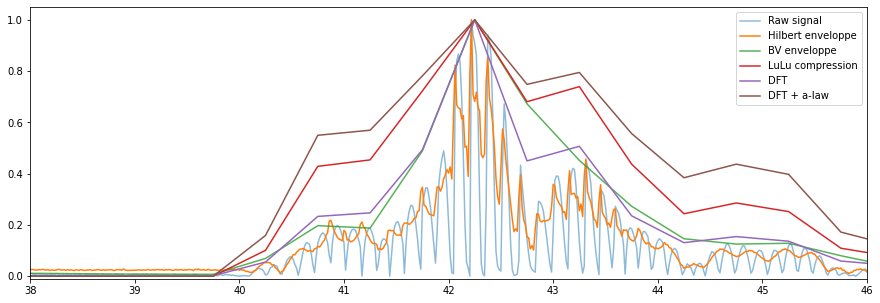

In [60]:
TFFT = [x +0.25 for x in data["tfft"] ]
plt.figure(figsize=(15,5))
plt.plot(t,np.abs(signal)/np.max(np.abs(signal[40*64:50*64])),alpha=0.5,label="Raw signal")
plt.plot(t,amplitude_envelope/np.max(np.abs(amplitude_envelope[40*64:50*64])),label="Hilbert enveloppe")

plt.plot(TFFT,BiVi/np.max(BiVi[80:100]), label = "BV enveloppe",alpha=0.8)

plt.plot(TFFT,data["single_fft"]/np.max(data["single_fft"][80:100]), label = "LuLu compression")
plt.plot(TFFT,ref_fft/np.max(ref_fft[80:100]), label = "DFT")
plt.plot(TFFT,com_fft/np.max(com_fft[80:100]), label = "DFT + a-law")

plt.ylim((-0.01,1.05))
plt.xlim((38,46))
plt.legend()
plt.show()

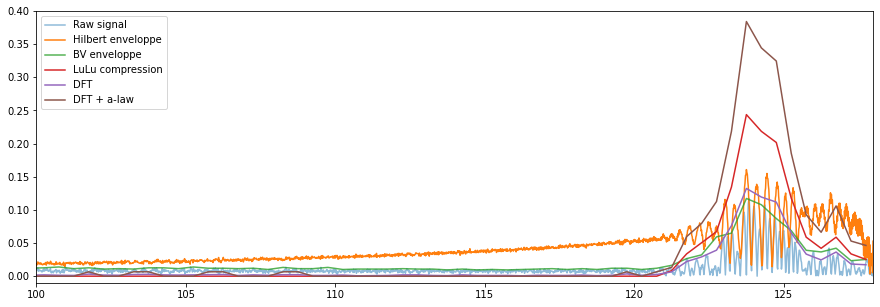

In [63]:
TFFT = [x +0.25 for x in data["tfft"] ]
plt.figure(figsize=(15,5))

plt.plot(t,np.abs(signal)/np.max(np.abs(signal[40*64:50*64])),alpha=0.5,label="Raw signal")
plt.plot(t,amplitude_envelope/np.max(np.abs(amplitude_envelope[40*64:50*64])),label="Hilbert enveloppe")

plt.plot(TFFT,BiVi/np.max(BiVi[80:100]), label = "BV enveloppe",alpha=0.8)

plt.plot(TFFT,data["single_fft"]/np.max(data["single_fft"][80:100]), label = "LuLu compression")
plt.plot(TFFT,ref_fft/np.max(ref_fft[80:100]), label = "DFT")
plt.plot(TFFT,com_fft/np.max(com_fft[80:100]), label = "DFT + a-law")

plt.ylim((-0.01,0.4))
plt.xlim((100,128))
plt.legend()
plt.show()